# Data analysis

#### URIEL ISAAC ALVAREZ CARDENAS 
Curated Breast Imaging Subset of Digital Database for Screening Mammography (CBIS-DDSM)
https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=22516629#225166296af7157f6e4641c286eee03e498e9305

In [12]:
import pandas as pd

mass_train = pd.read_csv("mass_case_description_train_set.csv")
mass_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [13]:
# Melt the DataFrame
value_vars = ["image file path", "cropped image file path", "ROI mask file path"]

mass_train_melt = mass_train.melt(id_vars=["assessment"], value_vars=value_vars, var_name="Path Type", value_name="Path")
mass_train_melt

,assessment,Path Type,Path
0,4,image file path,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,4,image file path,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,4,image file path,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,4,image file path,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,4,image file path,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
...,...,...,...
3949,3,ROI mask file path,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
3950,3,ROI mask file path,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
3951,3,ROI mask file path,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
3952,3,ROI mask file path,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [14]:
# Drop the "Path Type" column
mass_train_melt = mass_train_melt.drop("Path Type", axis=1)

# Identify duplicated values in the "Path" column
duplicated_paths = mass_train_melt[mass_train_melt['Path'].duplicated()]['Path']

 # Clean the repeated values by dropping duplicates
mass_train_melt = mass_train_melt.drop_duplicates(subset=['Path'])


mass_train_melt.to_csv('mass_train_labels.csv', index = False)
mass_train_melt

,assessment,Path
0,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,4,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,4,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,4,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
...,...,...
3949,3,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
3950,3,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
3951,3,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
3952,3,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


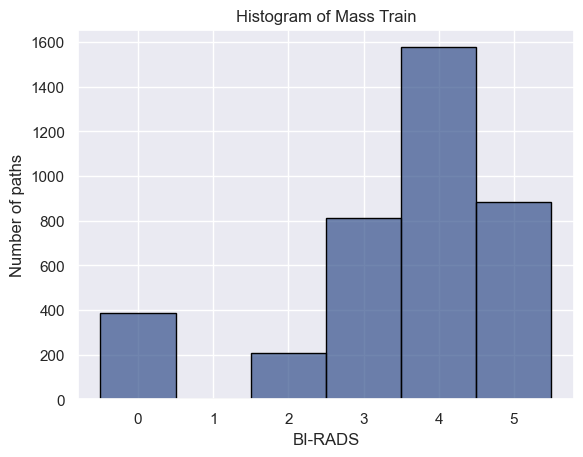

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = mass_train_melt

# Get the 'assessment' column from the DataFrame
assessment_data = df['assessment']

# Calculate bin edges
bin_edges = np.arange(min(assessment_data), max(assessment_data) + 2) - 0.5

sns.set(style='darkgrid')

# Create the histogram using Seaborn
ax = sns.histplot(data=assessment_data, bins=bin_edges, edgecolor='black', color='#35518c', alpha=0.7)
ax.set(xlabel='BI-RADS', ylabel='Number of paths')
ax.set_title('Histogram of Mass Train')
plt.show()

In [16]:
def create_histogram_and_clean_dataset(dataset, dataset_name):
    value_vars = ["image file path", "cropped image file path", "ROI mask file path"]

    # Melt the DataFrame
    melted_dataset = dataset.melt(id_vars=["assessment"], value_vars=value_vars, var_name="Path Type", value_name="Path")

    # Drop the "Path Type" column
    melted_dataset = melted_dataset.drop("Path Type", axis=1)

    # Identify duplicated values in the "Path" column
    duplicated_paths = melted_dataset[melted_dataset['Path'].duplicated()]['Path']

    # Clean the repeated values by dropping duplicates
    cleaned_dataset = melted_dataset.drop_duplicates(subset=['Path'])

    # Save the cleaned dataset to a CSV file
    filename = dataset_name + "_labels.csv"
    cleaned_dataset.to_csv(filename, index=False)
    print(f"Dataset cleaned and saved as '{filename}'")

    # Get the 'assessment' column from the cleaned dataset
    assessment_data = cleaned_dataset['assessment']

    # Calculate bin edges
    bin_edges = np.arange(min(assessment_data), max(assessment_data) + 2) - 0.5

    # Set the Seaborn style
    sns.set(style='darkgrid')

    # Create the histogram using Seaborn
    ax = sns.histplot(data=assessment_data, bins=bin_edges, edgecolor='black', color='#35518c', alpha=0.7)

    # Set labels and title for the histogram
    ax.set(xlabel='BI-RADS', ylabel='Number of paths')
    ax.set_title('Histogram of ' + dataset_name)
    plt.show()

Dataset cleaned and saved as 'calc_train_labels.csv'


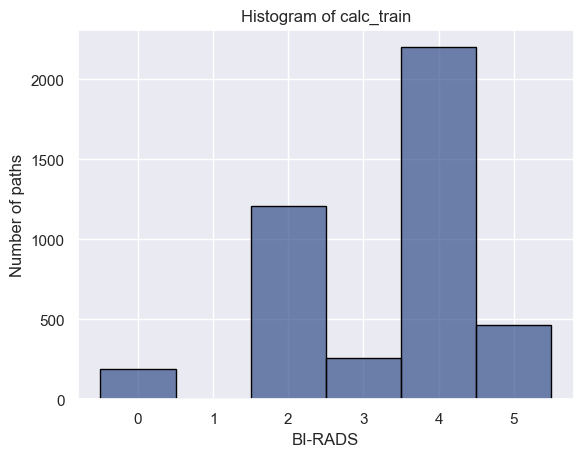

In [17]:
calc_train = pd.read_csv("calc_case_description_train_set.csv")
create_histogram_and_clean_dataset(calc_train, "calc_train")

Dataset cleaned and saved as 'calc_test_labels.csv'


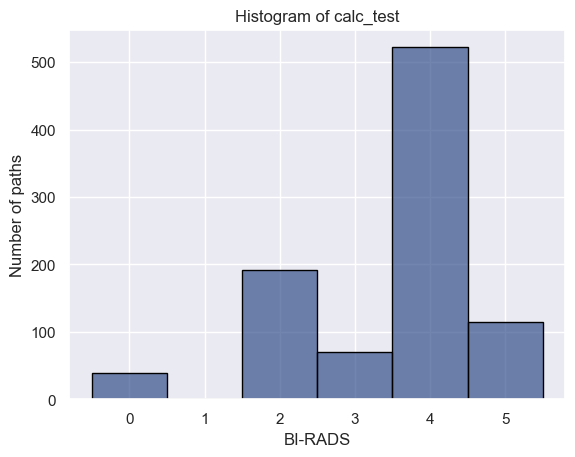

In [18]:
calc_test = pd.read_csv("calc_case_description_test_set.csv")
create_histogram_and_clean_dataset(calc_test, 'calc_test')

Dataset cleaned and saved as 'mass_test_labels.csv'


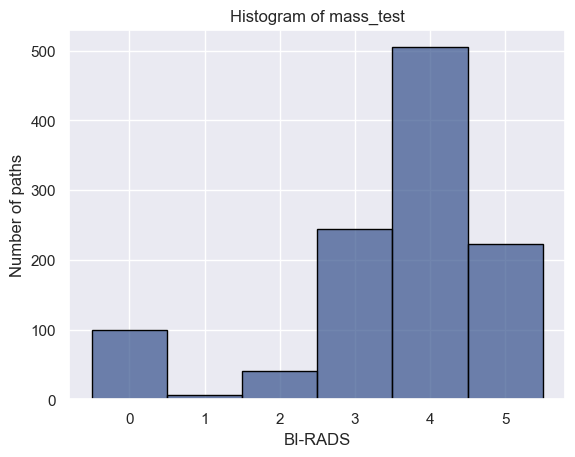

In [19]:
mass_test = pd.read_csv("mass_case_description_test_set.csv")
create_histogram_and_clean_dataset(mass_test, 'mass_test')

# Analicemos un poco lo que tenemos

- 3867 <- mass train
- 4319 <- calc train
- 936 <- calc test
- 1117 <- mass test


- Train = 8186 
- Test = 2053


- Total = 10239 

Lo que es aproximadamente una particion de 80, 20%, asi que vamos a tomar el dataset de test para sacar la particion de validacion.

Pero antes vamos a guardar el dataset de entrenamiento

In [20]:
# Load the two DataFrames
mass_test_labels = pd.read_csv('mass_train_labels.csv')
calc_test_labels = pd.read_csv('calc_train_labels.csv')

# Combine the two DataFrames
combined_df = pd.concat([mass_test_labels, calc_test_labels], ignore_index=True)
combined_df.to_csv("train_labels.csv", index=False)

# Load the two DataFrames
mass_test_labels = pd.read_csv('mass_test_labels.csv')
calc_test_labels = pd.read_csv('calc_test_labels.csv')

# Combine the two DataFrames
combined_df = pd.concat([mass_test_labels, calc_test_labels], ignore_index=True)
combined_df

,assessment,Path
0,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...
1,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...
2,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...
3,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...
4,0,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...
...,...,...
2048,0,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
2049,0,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
2050,0,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
2051,0,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [21]:
# Shuffle the combined DataFrame
shuffled_df = combined_df.sample(frac=1, random_state=42)

# Calculate the split index
split_index = int(0.5 * len(shuffled_df))

# Split the shuffled DataFrame into validation and test sets
validation_df = shuffled_df[:split_index]
test_df = shuffled_df[split_index:]

test_df.tail(5)

,assessment,Path
1638,4,Calc-Test_P_01490_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1095,0,Mass-Test_P_01765_RIGHT_MLO_1/1.3.6.1.4.1.9590...
1130,4,Calc-Test_P_00127_RIGHT_MLO/1.3.6.1.4.1.9590.1...
1294,5,Calc-Test_P_01390_RIGHT_MLO/1.3.6.1.4.1.9590.1...
860,2,Mass-Test_P_00510_LEFT_MLO_2/1.3.6.1.4.1.9590....


In [22]:
# Save the validation and test sets to CSV files
validation_df.to_csv('validation_labels.csv', index=False)
test_df.to_csv('test_labels.csv', index=False)

Ya tenemos las rutas etiquetadas, ahora queda formar los dataset de las imagenes como tal y ademas convertir cada una a png.

Los dataset en los que nos debemos enforcar son:

- "test_labels.csv"
- "train_labels.csv"
- "validation_labels.csv"